# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Import and Preparing Data

In [2]:
df = pd.read_csv('book.csv', encoding='latin1')
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# Rename columns
df1 = df.rename(columns={'User.ID': 'UserID', 'Book.Title': 'BookTitle', 'Book.Rating': 'BookRating'})

In [5]:
df1.sort_values(by='UserID').reset_index(drop=True)

,UserID,BookTitle,BookRating
0,8,Wings,5
1,8,The Western way: A practical guide to the West...,5
2,8,Ancient Celtic Romances,5
3,8,Truckers,5
4,8,The Art Of Celtia,7
...,...,...,...
9995,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
9996,278854,Celtic Mythology (Library of the World's Myths...,8
9997,278854,A corrente de Trewis Scott,7
9998,278854,As valkÃ­rias,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [7]:
# Number of unique Users in the DataSet
len(df1.UserID.unique())

2182

In [8]:
# Number of unique Books in the DataSet
len(df1.BookTitle.unique())

9659

In [9]:
# duplicates
duplicate_entries = df1[df1.duplicated(subset=['UserID', 'BookTitle'], keep=False)]
print(duplicate_entries)

      UserID                    BookTitle  BookRating
1975  278418     White Oleander : A Novel          10
2001  278418     White Oleander : A Novel           5
3786    1211                  Black House           8
3792    1211                  Black House           9
4730    2033               The First Time           7
4745    2033               The First Time           2
5050    2152    Le nouveau soleil de Teur           7
5051    2152    Le nouveau soleil de Teur           7
5218    2276  In the Beauty of the Lilies           9
5219    2276  In the Beauty of the Lilies          10
7045    3757          The Magician's Tale           7
7439    3757          The Magician's Tale           7
9778  162052                         Rose           4
9945  162052                         Rose           8


In [10]:
Book_df = df1.groupby(['UserID', 'BookTitle'])['BookRating'].mean().reset_index()

In [11]:
Book_df.head()

,UserID,BookTitle,BookRating
0,8,Ancient Celtic Romances,5.0
1,8,Keepers of the Earth Teachers Guide,6.0
2,8,The Art Of Celtia,7.0
3,8,The Celts Activity Book,6.0
4,8,The Western way: A practical guide to the West...,5.0


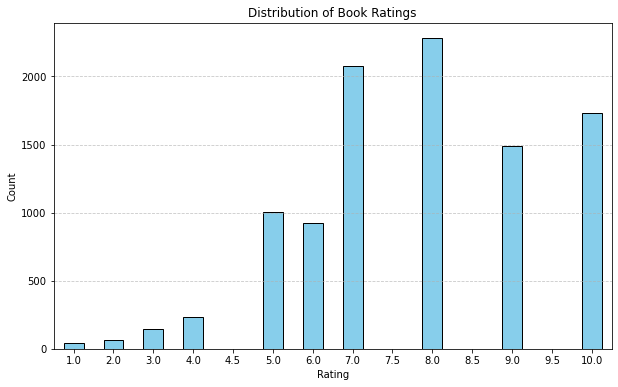

In [12]:
Book_df['BookRating'].value_counts().sort_index().plot(kind='bar',
                                                 color='skyblue',
                                                 edgecolor='black',
                                                 figsize=(10, 6),
                                                 title='Distribution of Book Ratings',
                                                 xlabel='Rating',
                                                 ylabel='Count',
                                                 rot=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### User Item Interaction Matrix

In [13]:
user_book_df = Book_df.pivot(index='UserID', columns='BookTitle', values='BookRating').reset_index()

In [14]:
user_book_df

BookTitle,UserID,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,278852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ratings_count_per_book = user_book_df.notnull().sum()
most_rated_books = ratings_count_per_book.sort_values(ascending=False)
print("Books rated by the most users:")
print(most_rated_books)

Books rated by the most users:
BookTitle
UserID                                                                    2182
Fahrenheit 451                                                               5
Stardust                                                                     4
Ender's Game (Ender Wiggins Saga (Paperback))                                4
Vanished                                                                     4
                                                                          ... 
His and Hers: Ranchin' Dads (Harlequin - Western Lovers)                     1
His-And-Hers Twins (Harlequin American Romance, No. 820)                     1
Histoires Extraordinaires                                                    1
Historia de la vida del BuscÃ³n (Selecciones Austral ; 24 : ClÃ¡sicos)       1
Ã?Â?bermorgen.                                                               1
Length: 9660, dtype: int64


In [16]:
# Impute Nan with 0 values
user_book_df.fillna(0,inplace=True)

In [17]:
user_book_df

BookTitle,UserID,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Calculating Cosine Similarities between Users
user_sim = 1-pairwise_distances(user_book_df.values, metric='cosine')

In [19]:
user_sim

array([[1.        , 0.39429125, 0.40634798, ..., 0.4738791 , 0.4738791 ,
        0.4738791 ],
       [0.39429125, 1.        , 0.71347724, ..., 0.83205029, 0.83205029,
        0.83205029],
       [0.40634798, 0.71347724, 1.        , ..., 0.85749292, 0.85749293,
        0.85749292],
       ...,
       [0.4738791 , 0.83205029, 0.85749292, ..., 1.        , 1.        ,
        0.99999999],
       [0.4738791 , 0.83205029, 0.85749293, ..., 1.        , 1.        ,
        1.        ],
       [0.4738791 , 0.83205029, 0.85749292, ..., 0.99999999, 1.        ,
        1.        ]])

In [20]:
user_sim_df = pd.DataFrame(user_sim)
user_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.000000,0.394291,0.406348,0.364044,0.395067,0.413021,0.398829,0.444661,0.451572,0.420872,...,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879
1,0.394291,1.000000,0.713477,0.639199,0.693670,0.725195,0.700275,0.780749,0.792882,0.738980,...,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050
2,0.406348,0.713477,1.000000,0.658744,0.714881,0.747370,0.721688,0.804623,0.817127,0.761576,...,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493
3,0.364044,0.639199,0.658744,1.000000,0.640457,0.669563,0.646555,0.720855,0.732058,0.682290,...,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221
4,0.395067,0.693670,0.714881,0.640457,1.000000,0.726622,0.701653,0.782285,0.794443,0.740434,...,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688


In [21]:
# set the index and column names to User Ids
user_sim_df.index=Book_df.UserID.unique()
user_sim_df.columns=Book_df.UserID.unique()

In [22]:
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.000000,0.394291,0.406348,0.364044,0.395067,0.413021,0.398829,0.444661,0.451572,0.420872,...,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879
9,0.394291,1.000000,0.713477,0.639199,0.693670,0.725195,0.700275,0.780749,0.792882,0.738980,...,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050
10,0.406348,0.713477,1.000000,0.658744,0.714881,0.747370,0.721688,0.804623,0.817127,0.761576,...,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493
12,0.364044,0.639199,0.658744,1.000000,0.640457,0.669563,0.646555,0.720855,0.732058,0.682290,...,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221
14,0.395067,0.693670,0.714881,0.640457,1.000000,0.726622,0.701653,0.782285,0.794443,0.740434,...,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
278849,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
278851,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
278852,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
np.fill_diagonal(user_sim,0)

In [24]:
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.000000,0.394291,0.406348,0.364044,0.395067,0.413021,0.398829,0.444661,0.451572,0.420872,...,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879
9,0.394291,0.000000,0.713477,0.639199,0.693670,0.725195,0.700275,0.780749,0.792882,0.738980,...,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050
10,0.406348,0.713477,0.000000,0.658744,0.714881,0.747370,0.721688,0.804623,0.817127,0.761576,...,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493
12,0.364044,0.639199,0.658744,0.000000,0.640457,0.669563,0.646555,0.720855,0.732058,0.682290,...,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221
14,0.395067,0.693670,0.714881,0.640457,0.000000,0.726622,0.701653,0.782285,0.794443,0.740434,...,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
278849,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
278851,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
278852,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


In [25]:
# Most similar Users
user_sim_df.idxmax(axis=1).head(20)

8     278755
9     278755
10    278755
12    278755
14    278755
16    278755
17    278755
19    278418
22    278755
26    278755
32    278755
39    278755
42    278755
44    278755
51    278755
53      1996
56    278755
64    278755
67    278755
69    278755
dtype: int64

In [26]:
Book_df[(Book_df['UserID']==8) | (Book_df['UserID']==64)]

,UserID,BookTitle,BookRating
0,8,Ancient Celtic Romances,5.0
1,8,Keepers of the Earth Teachers Guide,6.0
2,8,The Art Of Celtia,7.0
3,8,The Celts Activity Book,6.0
4,8,The Western way: A practical guide to the West...,5.0
5,8,Truckers,5.0
6,8,Wings,5.0
34,64,Fear Nothing,7.0


In [27]:
user1 = Book_df[Book_df['UserID']==53]
user1

,UserID,BookTitle,BookRating
28,53,Prey,9.0
29,53,Reliquary,10.0
30,53,Sick Puppy,3.0
31,53,Turning Thirty,6.0


In [28]:
user2 = Book_df[Book_df['UserID']==1996]
user2

,UserID,BookTitle,BookRating
2189,1996,"CSI, Miami: Heat Wave",7.0
2190,1996,Sick Puppy,8.0
2191,1996,Tempting the Heiress,7.0


In [29]:
Book_df[(Book_df['UserID']==8) | (Book_df['UserID']==278755)]

,UserID,BookTitle,BookRating
0,8,Ancient Celtic Romances,5.0
1,8,Keepers of the Earth Teachers Guide,6.0
2,8,The Art Of Celtia,7.0
3,8,The Celts Activity Book,6.0
4,8,The Western way: A practical guide to the West...,5.0
5,8,Truckers,5.0
6,8,Wings,5.0
9914,278755,"The Elements of Style, Fourth Edition",1.0


In [30]:
pd.merge(user1, user2, on='BookTitle', how='outer')

,UserID_x,BookTitle,BookRating_x,UserID_y,BookRating_y
0,53.0,Prey,9.0,NaN,NaN
1,53.0,Reliquary,10.0,NaN,NaN
2,53.0,Sick Puppy,3.0,1996.0,8.0
3,53.0,Turning Thirty,6.0,NaN,NaN
4,NaN,"CSI, Miami: Heat Wave",NaN,1996.0,7.0
5,NaN,Tempting the Heiress,NaN,1996.0,7.0


In [43]:
def get_recommendation(customer_id):
    # Get top 3 similar customers
    similar_customers = list(user_sim_df.sort_values([customer_id], ascending=False).head(3).index)
    
    # Get books rated by similar customers
    book_list = list(Book_df[Book_df['UserID'].isin(similar_customers)]['BookTitle'])
    
    # Get recommended books not rated by the customer
    rated_books_by_customer = set(Book_df[Book_df['UserID'] == customer_id]['BookTitle'])
    recommended_books = set(book_list) - rated_books_by_customer
    
    return recommended_books

In [48]:
get_recommendation(9)

{"Having Our Say: The Delany Sisters' First 100 Years",
 'How to Say It Style Guide',
 'The Elements of Style, Fourth Edition'}

## Item Based Collaborative Filtering

In [49]:
Stardust_user_rating =Book_df[Book_df['BookTitle'] == 'Stardust']

In [50]:
Stardust_user_rating

,UserID,BookTitle,BookRating
1516,1348,Stardust,8.0
1938,1733,Stardust,8.0
3296,2576,Stardust,10.0
5946,160926,Stardust,8.0


In [51]:
# Finding the correlation with different Movies
similar_to_Stardust = user_book_df.corrwith(Stardust_user_rating)

In [52]:
similar_to_Stardust.head(10)

UserID                                                                   1.0
 Jason, Madison &amp                                                     NaN
 Other Stories;Merril;1985;McClelland &amp                               NaN
 Repairing PC Drives &amp                                                NaN
'48                                                                      NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities    NaN
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR             NaN
01-01-00: A Novel of the Millennium                                      NaN
1,401 More Things That P*Ss Me Off                                       NaN
10 Commandments Of Dating                                                NaN
dtype: float64

In [53]:
corr_Stardust=pd.DataFrame(similar_to_Stardust, columns=['correlation'])
corr_Stardust.dropna(inplace=True)
corr_Stardust.head()

,correlation
UserID,1.0


In [54]:
corr_Stardust[corr_Stardust['correlation']>0].sort_values(by='correlation', ascending=False).head()

,correlation
UserID,1.0


### --- END ---